In [1]:
suppressMessages(suppressWarnings(library(VennDiagram)))
suppressMessages(suppressWarnings(library(vcd)))
suppressMessages(suppressWarnings(library(plyr)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(ggbeeswarm)))
suppressMessages(suppressWarnings(library(vcdExtra)))
suppressMessages(suppressWarnings(library(dplyr)))
source("../lib/pcaFunctions.R")
suppressMessages(suppressWarnings(library(org.Hs.eg.db)))
suppressMessages(suppressWarnings(library(ggpubr)))

### The following block of code preforms RNA seq analysis from the raw HTseq reads. The first 89 samples (columns) are African; the remaining 373 are European. Ethnicities were taken the from metadata of the 1000 Genomes Project. Note that this takes up to 10 minutes.

In [2]:
suppressMessages(suppressWarnings(library(DESeq2)))
count.table <- read.table("../data/S5_Dataset.txt")
grp <- c(rep("AFR",89),rep("EUR",373))
cData <- data.frame(ethnicity = as.factor(grp))
rownames(cData) <- colnames(count.table)
d.deseq <- DESeqDataSetFromMatrix(countData = count.table,colData = cData, design = ~ethnicity)
d.deseq <- DESeq(d.deseq)
res <- results(d.deseq,contrast=c("ethnicity","EUR","AFR"))
res$ensembl_id <- rownames(res)
labels <- data.frame(ensembl_id=c("ENSG00000134202","ENSG00000116157","ENSG00000143194","ENSG00000166394"))
geneNames <- mapIds(org.Hs.eg.db,keys = rownames(d.deseq),column = "SYMBOL",keytype="ENSEMBL")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1032 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

'select()' returned 1:many mapping between keys and columns



# figure 2a
Labels are the top 2 upregulated and top 2 downregulated genes assocaited with overlapping EBML/eSTRs. The published version had a little different color scheme.

'select()' returned 1:many mapping between keys and columns

Warning message:
“Removed 6898 rows containing missing values (geom_point).”


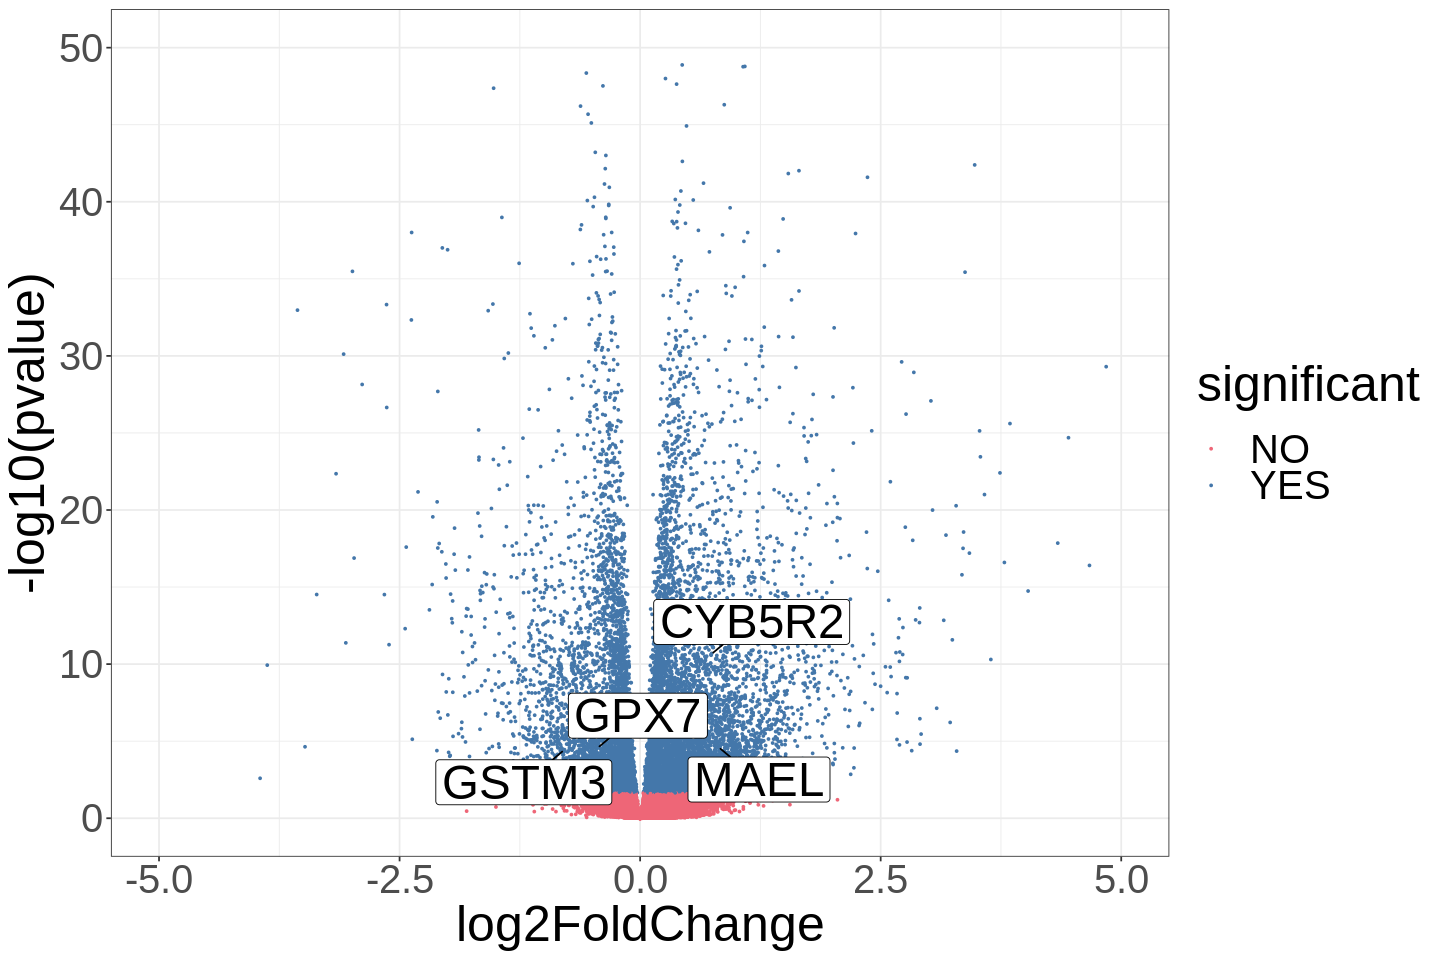

In [3]:
options(repr.plot.width=12, repr.plot.height=8)
font.label = data.frame(size=12,face="plain",color="black")#c(12, "plain","black")
res$name <- mapIds(org.Hs.eg.db,keys = rownames(res),column = "SYMBOL",keytype="ENSEMBL")
res$significant <- "NO"
res[which(res$padj < .05),c("significant")] <- "YES"
volcano <- ggplot(data.frame(res), aes(x=log2FoldChange, y=-log10(pvalue)))
volcano <- volcano + geom_point(aes(color = significant),size = .4, alpha = 1)
volcano <- volcano + xlim(c(-5,5)) + ylim(c(0,50))
volcano <- volcano + ggrepel::geom_label_repel(data = data.frame(res[which(res$ensembl_id %in% labels$ensembl_id),]), 
                                   mapping = aes(label = name), box.padding = unit(0.35,"lines"), point.padding = unit(.1, "lines"), 
                                   force = .5, fontface = font.label$face, size = 10, 
                                   color = font.label$color)
volcano <- volcano + theme_bw()
volcano <- volcano + scale_color_manual(values = c("#ee6677", "#4477aa"))
volcano <- volcano + theme(text = element_text(size = 30))
plot(volcano)

# figure 2b
MAplot just emphasizes that there are 8640 upregulated genes and 5484 downregulated genes.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 6878 rows containing missing values (geom_point).”


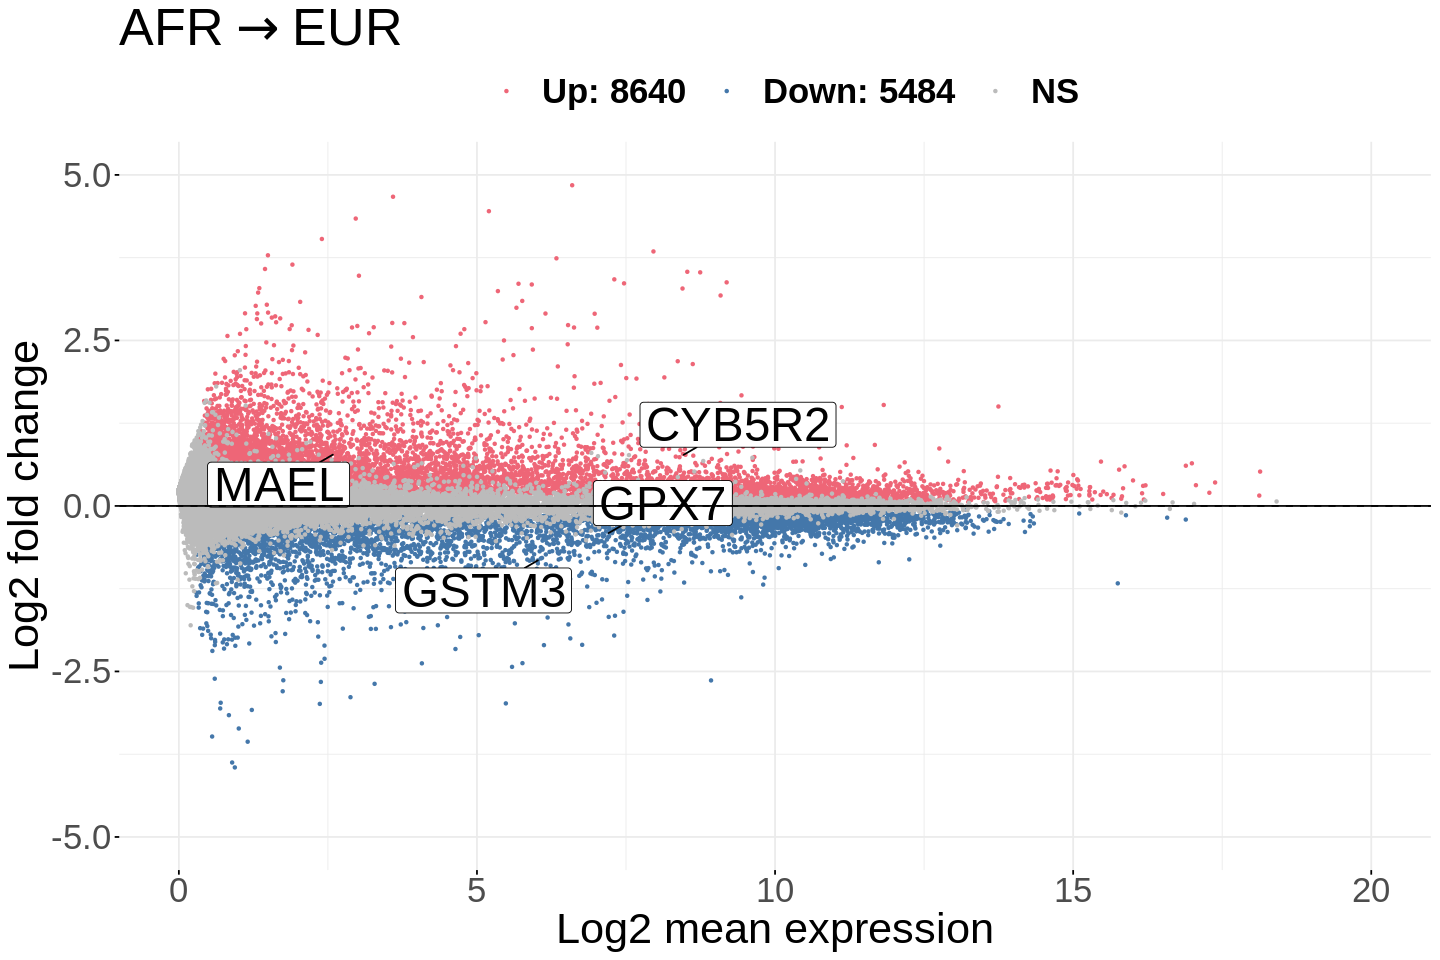

In [4]:
options(repr.plot.width=12, repr.plot.height=8)
maplot <- ggmaplot(res, main = expression("AFR" %->% "EUR"),
   fdr = 0.05, fc = 1.00, size = 0.6,
   palette = c("#ee6677", "#4477aa", "#bbbbbb"),
   genenames = geneNames,
   legend = "top", 
   top = 0,
   label.select = geneNames[res[which(res$ensembl_id %in% labels$ensembl_id),c("ensembl_id")]],
   font.label = c(30,"plain","black"), label.rectangle = TRUE,
   font.legend = "bold",
   font.main = "bold",
   ggtheme = ggplot2::theme_minimal())
maplot <- maplot + ylim(-5,5)
maplot <- maplot + xlim(0,20)
maplot <- maplot + theme(text = element_text(size = 26)) 
plot(maplot)